# Project 3: Modified Momentum MA

## Introduction
This project explores a modified momentum strategy using moving averages. The objective is to analyze the performance of this modified strategy and compare it with traditional momentum strategies.

## Table of Contents
1. Introduction
2. Data Preparation
3. Strategy Implementation
4. Results and Analysis
5. Conclusion
6. References

# **Improved MA Momentum**

### **Early December 2022**

So after collecting ideas from our newfound friend (refering to Je Suit TM), I took inspiration of his backtesting system and implemented a rigorous system for our first project. At the time, I was fixated with speed of the system. The important thing in this case was not that trading strategy should work, but that it should be fast... And fast it was. I remember even talking to professors at school to figure out the coding logic of the *portfolio*-function.

# Mathematical Explanation of Portfolio Function

This document provides a detailed mathematical description of the `portfolio` function, which evaluates two trading strategies: a long strategy and a short strategy.

## Function Inputs and Parameters

- `df`: DataFrame containing signals for trading strategies and asset closing prices.
  - `cross long` (CL) - Signals indicating when a long position should be taken.
  - `cross short` (CS) - Signals indicating when a short position should be taken.
  - `Close` (P) - Closing prices of the asset.
- `capital0`: Initial capital, defaulting to $10,000.
- `positions`: Number of shares involved per trading position, defaulting to 100.

## Mathematical Formulation

### Step 1: Cumulative Sum of Trading Signals

For a long strategy:

$$ \text{cumsum}_{\text{long}, i} = \sum_{j=1}^{i} \text{CL}_j $$

For a short strategy:

$$ \text{cumsum}_{\text{short}, i} = \sum_{j=1}^{i} \text{CS}_j $$

These cumulative sums keep track of active positions in both strategies.

### Step 2: Percentage Price Change

The daily percentage change in the asset's closing price is calculated as follows:

$$ \Delta P_i = \frac{P_i - P_{i-1}}{P_{i-1}} $$

where:
- $P_i $ is the closing price on day $ i $.
- $ \Delta P_i $ is the percentage price change from the previous day.

### Step 3: Long Strategy Percentage Change

$$\text{price change}_{\text{long}, i} = \begin{cases}
1 + \Delta P_i & \text{if } \text{CL}_i = 1\\
1 & \text{otherwise}
\end{cases} $$

The cumulative product of these values gives the performance of the long strategy:

$$ \text{long strategy percentage}_i = \prod_{j=1}^{i} \text{price change}_{\text{long}, j} $$

### Step 4: Short Strategy Percentage Change

$$ \text{price change}_{\text{short}, i} = \begin{cases}
1 - \Delta P_i & \text{if } \text{CS}_i = 1\\
1 & \text{otherwise}
\end{cases} $$

The cumulative product of these values gives the performance of the short strategy:

$$ \text{short strategy percentage}_i = \prod_{j=1}^{i} \text{price change}_{\text{short}, j} $$

### Outputs

- **Portfolio DataFrame**: The function returns a DataFrame structured as follows:
  - `price`: Closing prices over time.
  - `price change`: Daily price changes for the long strategy.
  - `long strategy percentage`: Cumulative performance of the long strategy.
  - `price change short`: Daily price changes for the short strategy.
  - `short strategy percentage`: Cumulative performance of the short strategy.
  - `date`: Date for each observation, which becomes the index of the DataFrame.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


           Date        Open        High         Low       Close   Adj Close  \
0    2008-09-30  113.510002  116.800003  110.529999  115.989998   86.187698   
1    2008-10-01  115.269997  116.690002  113.949997  116.059998   86.239700   
2    2008-10-02  114.949997  115.110001  111.059998  111.849998   83.111412   
3    2008-10-03  112.860001  115.449997  109.680000  110.339996   81.989418   
4    2008-10-06  107.150002  107.620003  100.639999  104.720001   77.813377   
...         ...         ...         ...         ...         ...         ...   
3545 2022-10-28  379.869995  389.519989  379.679993  389.019989  380.262817   
3546 2022-10-31  386.440002  388.399994  385.260010  386.209991  377.516113   
3547 2022-11-01  390.140015  390.390015  383.290009  384.519989  375.864166   
3548 2022-11-02  383.899994  388.630005  374.760010  374.869995  366.431366   
3549 2022-11-03  371.470001  374.200012  368.790009  371.010010  362.658295   

         Volume        date  
0     328154400  2008

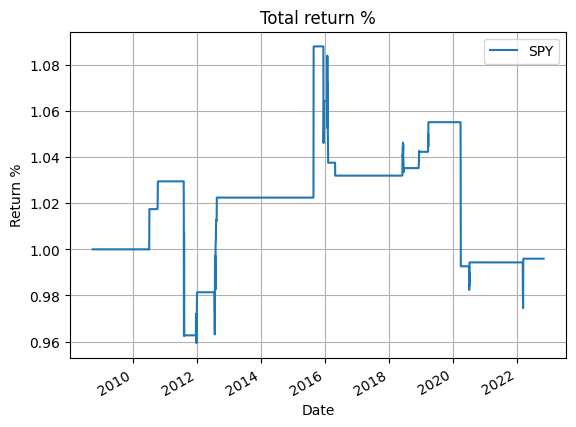

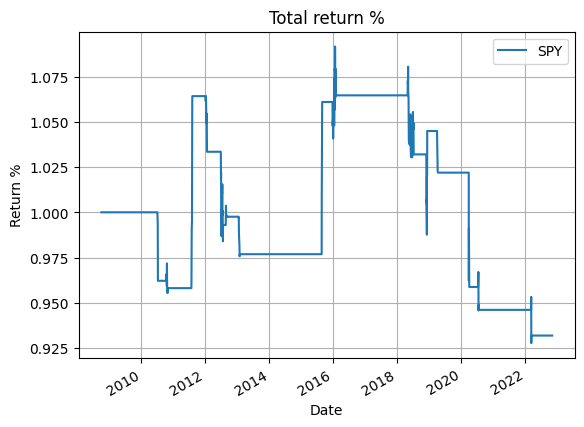

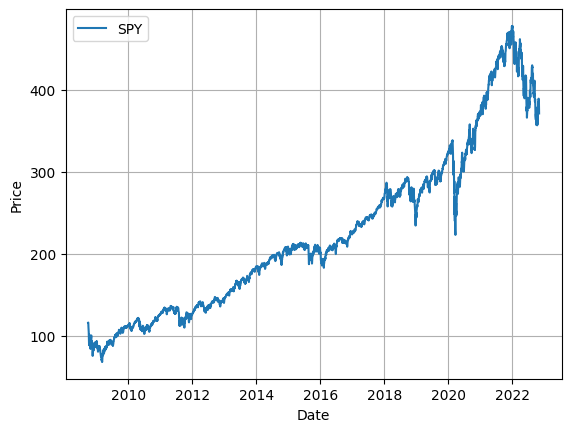

In [ ]:
from calendar import c
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import math

pd.set_option('mode.chained_assignment', None)

long_MA = 180
short_MA = 120
super_MA= 60
initial_wealth = '1000'
stock = 'SPY'
period = 'max'
start_date =  '2008-09-30'
end_date = '2022-11-04'
interval = '1d'
totalprofit = 0

def get_stock_data(stock,startdate,enddate,period,interval):
        ticker = stock
        yf.pdr_override()
        df = yf.download(tickers=stock, start=startdate, end=enddate, interval=interval,period=period)
        df.reset_index(inplace=True)
        df['date'] = df['Date'].dt.date

        return df
print(get_stock_data(stock,start_date,end_date,period,interval))

def ma_strategy(df,short_MA,long_MA,super_MA):
    df['long MA'] = df['Close'].rolling(int(long_MA)).mean()
    df['short MA'] = df['Close'].rolling(int(super_MA)).mean()
    df['super MA'] = df['Close'].rolling(int(short_MA)).mean()
    df['a']=np.where(df['long MA'] < df['short MA'],1.0,0.0)
    df['b']=np.where(df['short MA'] < df['super MA'],1.0,0.0)

    df['c']=np.where((df['super MA'] - df['short MA'] )> (df['short MA'] - df['long MA']),1.0, 0.0)

    df['a1']=np.where(df['long MA'] > df['short MA'],1.0,0.0)
    df['b1']=np.where(df['short MA'] > df['super MA'],1.0,0.0)
    df['c1']=np.where((df['super MA'] - df['short MA'] )< (df['short MA'] - df['long MA']),1.0, 0.0)

    df['cross long']=np.where((df['a']-df['b']-df['c']==-1),1,0)
    df['cross short']=np.where((df['a1']-df['b1']-df['c1'])==-1,1,0)
    df['crosszero']=df['cross long']+df['cross short']

    df['position long'] = df['cross long'].diff()
    df['position short'] = df['cross short'].diff()

    return df

def portfolio(df,capital0=10000,positions=100):

    df['cumsum']=df['cross long']
    df['cumsumshort']=df['cross short']

    portfolio=pd.DataFrame()

    portfolio['price']=df['Close']
    portfolio['pricec']=portfolio['price'].pct_change()

    portfolio['price change']= np.where(df['cumsum']==1, 1+portfolio['pricec'],1)
    portfolio['long strategy percentage']=portfolio['price change'].cumprod()

    portfolio['price change short']= np.where(df['cumsumshort']==1, 1-portfolio['pricec'],1)
    portfolio['short strategy percentage']=portfolio['price change short'].cumprod()

    portfolio['date']=df['Date']
    portfolio.set_index('date',inplace=True)

    return portfolio

def graph(df,stock,portfolios):
    fig=plt.figure()
    dx=fig.add_subplot(111)

    portfolios['long strategy percentage'].plot(label=stock)
    plt.legend(loc='best')
    plt.grid(True)
    plt.xlabel('Date')
    plt.ylabel('Return %')
    plt.title('Total return %')
    plt.show()

    fig=plt.figure()
    dx=fig.add_subplot(111)

    portfolios['short strategy percentage'].plot(label=stock)
    plt.legend(loc='best')
    plt.grid(True)
    plt.xlabel('Date')
    plt.ylabel('Return %')
    plt.title('Total return %')
    plt.show()

    fig=plt.figure()
    ax=fig.add_subplot(111)
    ax.plot(df['Date'],df['Close'],label=stock)
    plt.legend(loc='best')
    plt.grid(True)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('')
    plt.show()

df = get_stock_data(stock,start_date,end_date,period,interval)
df = ma_strategy(df,long_MA,short_MA,super_MA)
portfolios=portfolio(df,capital0=10000,positions=100)

graph(df,stock,portfolios)



